In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import glob

### ImageJのcolormapを利用する
- .lutファイルをバイナリで読み込み
#### matplotlibのcolormapに変換する
#### OpenCVのcolormapに変換する

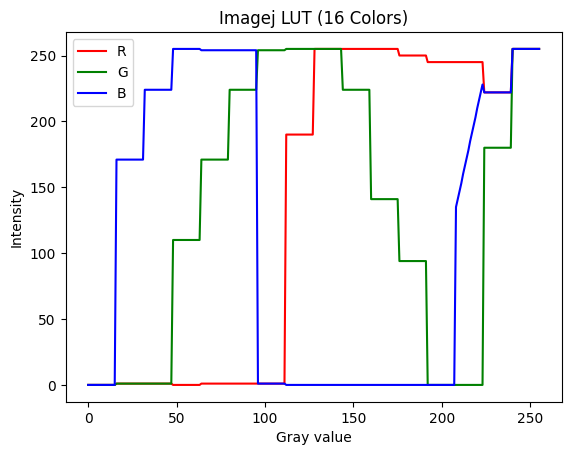

In [100]:
# ImageJ "16 Colors" LUT
imagej_16Colors_lut_path = './data/luts/16_Colors.lut'
f = open(imagej_16Colors_lut_path, 'rb')
_data = f.read()
f.close()
imagej_16Colors_lut = np.reshape(np.array([i for i in _data]), (3, 256))
imgj_16Colors = ListedColormap((np.reshape(imagej_16Colors_lut, (3, 256)).T) / 255.0)
pix = np.linspace(0, 255, 256)

def apply_lut(_img, _lut):
    _r, _g, _b = _lut
    _row, _col = _img.shape
    _rimg = np.zeros((_row, _col))
    _gimg = np.zeros((_row, _col))
    _bimg = np.zeros((_row, _col))
    for y in range(_row):
        for x in range(_col):
            _rimg[y, x] = _r[int(_img[y, x])]
            _gimg[y, x] = _g[int(_img[y, x])]
            _bimg[y, x] = _b[int(_img[y, x])]
    color_img = cv2.merge((_rimg, _gimg, _bimg))
    return color_img

# Display LUT
fig, ax = plt.subplots()
ax.plot(pix, imagej_16Colors_lut[0, :], color='red', label='R')
ax.plot(pix, imagej_16Colors_lut[1, :], color='green', label='G')
ax.plot(pix, imagej_16Colors_lut[2, :], color='blue', label='B')
ax.set_title('Imagej LUT (16 Colors)')
ax.set_xlabel('Gray value')
ax.set_ylabel('Intensity')
ax.legend()
plt.show()

In [83]:
path_list = glob.glob('./data/image/*.png')
img_list = [cv2.imread(path, cv2.IMREAD_ANYDEPTH) for path in path_list]
x = np.linspace(0, 511, 512)
target = 20000

In [53]:
def rotate_all_images(_img_list):
    _images = _img_list
    _images = [cv2.rotate(_img, cv2.ROTATE_90_CLOCKWISE) for _img in _images]
    return _images
    
def create_prof_list(_img_list):
    _prof_list = []
    _images = _img_list
    for _img in _images:
        _pfx = []
        for j in range(512):
            _pfx.append(_img[:, j].mean())
        _prof_list.append(_pfx)
    return _prof_list

mean_intensity_list = [np.mean(_img) for _img in img_list]
imgR90_list = rotate_all_images(img_list)
uni_x_list = [100 * (np.max(_img) - np.min(_img)) / (np.max(_img) + np.min(_img)) for _img in img_list ]
uni_y_list = [100 * (np.max(_img) - np.min(_img)) / (np.max(_img) + np.min(_img)) for _img in imgR90_list ]
prof_x_list = create_prof_list(img_list)
prof_y_list = create_prof_list(imgR90_list)

In [102]:
montage_img = np.hstack(img_list) / 255.0
montage_imgR90 = np.hstack(imgR90_list) / 255.0
montage_img = apply_lut(montage_img, imagej_16Colors_lut)
montage_imgR90 = apply_lut(montage_imgR90, imagej_16Colors_lut)
cv2.imwrite('./data/montage/x_montage.png', montage_img)
cv2.imwrite('./data/montage/y_montage.png', montage_imgR90)

True

In [101]:
print(mean_intensity_list)
print(uni_x_list)
print(uni_y_list)

[23035.482460021973, 23042.58544921875, 23039.222778320312, 23042.125900268555, 23038.558631896973, 23041.936603546143, 23039.11667251587, 23039.894485473633, 23039.923957824707, 23039.666919708252, 23040.46438217163, 23040.13709640503, 23040.05429458618]
[21.87684567428634, 20.146536217259683, 19.397566931005425, 19.20336509571637, 19.171729048272258, 21.41813493768801, 19.379109625956666, 19.267471533034545, 19.939603106125972, 20.14585232452142, 21.78312130897699, 20.31689683536084, 19.82241472658365]
[21.87684567428634, 20.146536217259683, 19.397566931005425, 19.20336509571637, 19.171729048272258, 21.41813493768801, 19.379109625956666, 19.267471533034545, 19.939603106125972, 20.14585232452142, 21.78312130897699, 20.31689683536084, 19.82241472658365]


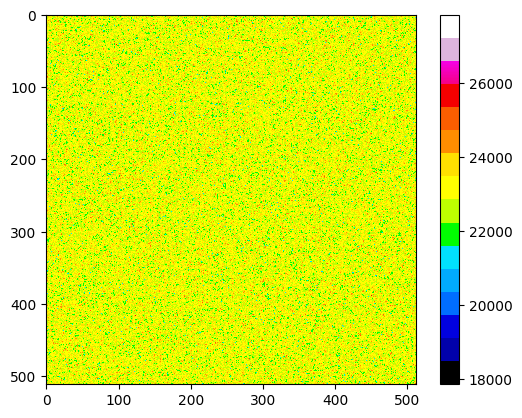

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ImageJ "16 Colors" LUT
imagej_16Colors_lut_path = './data/luts/16_Colors.lut'
f = open(imagej_16Colors_lut_path, 'rb')
dt = f.read()
f.close()
rgb_list = np.array([i for i in dt])
imagej_16Colors_lut = np.reshape(rgb_list, (3, 256)).T

# Original LUT
imagej_lut = np.array([
    [0, 0, 0],      # Black
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [255, 0, 255],  # Magenta
    [0, 255, 255],  # Cyan
    [192, 192, 192],  # Light Gray
    [128, 128, 128],  # Medium Gray
    [64, 64, 64],    # Dark Gray
    [255, 128, 0],   # Orange
    [128, 0, 255],   # Purple
    [128, 255, 0],   # Light Green
    [0, 255, 128],   # Sea Green
    [0, 128, 255],   # Light Blue
    [128, 128, 0]    # Olive
])

# Convert to values between 0 and 1
imagej_lut = imagej_lut / 255.0
imagej_16Colors_lut = imagej_16Colors_lut / 255.0

# Create ListedColormap
imagej_colormap = ListedColormap(imagej_lut)
imagej_16Colors_colormap = ListedColormap(imagej_16Colors_lut) 

# Example usage with imshow
plt.imshow(img_list[0], cmap=imagej_16Colors_colormap)
plt.colorbar()
plt.show()
